In [1]:
import numpy as np;
import csv;
import Simplex;
import matplotlib.pyplot as plt;
import matplotlib as mpl;
mpl.rcParams["figure.dpi"] = 300;

In [2]:
def lineCalc(x, a, b, C):
    return (C - a*x)/b;
def createList(r1, r2): 
    return [item for item in range(r1, r2+1)];

In [3]:
test = Simplex.Simplex("y5_max.txt")
test.solve();
test.showResultValues();

Init. Filename = y5_max.txt
['leq', 'leq', 'max']
  [  -1.00    3.00    6.00 ]
  [   7.00    1.00   35.00 ]
  [   7.00    9.00    0.00 ]

Solving using simplex...
Starting a new iteration with the following matrix: 
  [  -1.00    3.00    1.00    0.00    6.00 ]
  [   7.00    1.00    0.00    1.00   35.00 ]
  [  -7.00   -9.00    0.00    0.00   -0.00 ]

Pivot point is at: [0;1]

Starting a new iteration with the following matrix: 
  [  -0.33    1.00    0.33    0.00    2.00 ]
  [   7.33    0.00   -0.33    1.00   33.00 ]
  [ -10.00    0.00    3.00    0.00   18.00 ]

Pivot point is at: [1;0]

=========================Final Result=========================

  [   0.00    1.00    0.32    0.05    3.50 ]
  [   1.00    0.00   -0.05    0.14    4.50 ]
  [   0.00    0.00    2.55    1.36   63.00 ]

Solution is:
x1: 4.5
x2: 3.5
s1: 0
s2: 0


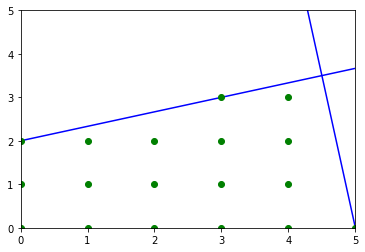

In [4]:
plt.xlim([0,5]);
plt.ylim([0,5]);
plt.plot([0,5],
        [
            lineCalc(0,-1,3,6), 
            lineCalc(5, -1, 3, 6)
        ], "b-");

plt.plot([0,5],
        [
            lineCalc(0, 7 ,1, 35), 
            lineCalc(5, 7 ,1, 35)
        ], "b-");

plt.plot(createList(0, 5), [0]*6, "go");
plt.plot(createList(0, 4), [1]*5, "go");
plt.plot(createList(0, 4), [2]*5, "go");
plt.plot(createList(3, 4), [3]*2, "go");

plt.show();

In [5]:
print(np.max(test.solutionMatrix[0:-2,-1]%1));
row = np.argmax(test.solutionMatrix[0:-2,-1]%1);
print(row);

0.5
0


In [6]:
g = np.copy(test.solutionMatrix);
g = np.insert(g,
             [
                 g.shape[1]-1
             ],
             np.zeros(1, dtype=np.float32),
             axis = 1);

s = -(g[row,]%1);
s[test.solutionMatrix.shape[1]-1] = 1;
g = np.insert(g, [g.shape[0]-1], s, axis=0);
Simplex.Simplex.printArray(g);
temp = g[g.shape[0]-1, :-1]/g[g.shape[0]-2, :-1];
print(temp);

  [   0.00    1.00    0.32    0.05    0.00    3.50 ]
  [   1.00    0.00   -0.05    0.14    0.00    4.50 ]
  [  -0.00   -0.00   -0.32   -0.05    1.00   -0.50 ]
  [   0.00    0.00    2.55    1.36    0.00   63.00 ]

[ nan  nan  -8. -30.   0.]


d:\program files\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [7]:
test.solutionMatrix = Simplex.Simplex.performElimiation(g, 2, g.shape[0]-2);
Simplex.Simplex.printArray(test.solutionMatrix);

  [   0.00    1.00    0.00   -0.00    1.00    3.00 ]
  [   1.00    0.00    0.00    0.14   -0.14    4.57 ]
  [   0.00    0.00    1.00    0.14   -3.14    1.57 ]
  [   0.00    0.00    0.00    1.00    8.00   59.00 ]



In [8]:
print(np.max(test.solutionMatrix[0:-2,-1]%1));
row = np.argmax(test.solutionMatrix[0:-2,-1]%1);
print(row);

0.5714285714285712
1


In [9]:
g = np.copy(test.solutionMatrix);
g = np.insert(g,
             [
                 g.shape[1]-1
             ],
             np.zeros(1, dtype=np.float32),
             axis = 1);

s = -(g[row,]%1);
s[test.solutionMatrix.shape[1]-1] = 1;
g = np.insert(g, [g.shape[0]-1], s, axis=0);
Simplex.Simplex.printArray(g);
temp = g[g.shape[0]-1, :-1]/g[g.shape[0]-2, :-1];
print(temp);

  [   0.00    1.00    0.00   -0.00    1.00    0.00    3.00 ]
  [   1.00    0.00    0.00    0.14   -0.14    0.00    4.57 ]
  [   0.00    0.00    1.00    0.14   -3.14    0.00    1.57 ]
  [  -0.00   -0.00   -0.00   -0.14   -0.86    1.00   -0.57 ]
  [   0.00    0.00    0.00    1.00    8.00    0.00   59.00 ]

[        nan         nan         nan -7.         -9.33333333  0.        ]


d:\program files\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [10]:
test.solutionMatrix = Simplex.Simplex.performElimiation(g, 3, g.shape[0]-2);
Simplex.Simplex.printArray(test.solutionMatrix);

  [   0.00    1.00    0.00    0.00    1.00   -0.00    3.00 ]
  [   1.00    0.00    0.00    0.00   -1.00    1.00    4.00 ]
  [   0.00    0.00    1.00    0.00   -4.00    1.00    1.00 ]
  [   0.00    0.00    0.00    1.00    6.00   -7.00    4.00 ]
  [   0.00    0.00    0.00    0.00    2.00    7.00   55.00 ]

